In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
#Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Merged_food.csv')

In [ ]:
# Extract only the time series which have data of all 145 weeks
col_name=df.columns
updated_df=pd.DataFrame(columns=col_name)

for x in df['meal_id'].unique():
  #print('meal_id={}'.format(x))
  for y in df['center_id'].unique():
    #print('center_id={}'.format(y))
    j=0
    temp=df[df['center_id']==y]
    temp=temp[temp['meal_id']==x]
    if temp.empty:
      continue
    if len(temp)!=145:
     #print("skipped{} {}".format(x,y))
      continue
    updated_df=pd.concat([updated_df,temp])

In [ ]:
updated_df.to_csv('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Extracted_food.csv')
updated_df

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451765,451765,1245138,141,27,1847,194.00,196.00,0,0,163,713,85,TYPE_A,4.5,Soup,Thai
451766,451766,1290209,142,27,1847,195.00,195.00,0,0,190,713,85,TYPE_A,4.5,Soup,Thai
451767,451767,1073275,143,27,1847,196.00,196.00,0,0,244,713,85,TYPE_A,4.5,Soup,Thai
451768,451768,1464574,144,27,1847,196.00,194.00,0,0,108,713,85,TYPE_A,4.5,Soup,Thai


In [ ]:
updated_df=pd.read_csv(('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Extracted_food.csv'))

In [ ]:
updated_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
def calc_mean(col):
  return col.mean()

In [ ]:
#Extracting a portion of the dataset
data_new = pd.DataFrame(updated_df.groupby(['center_id','week']).agg({'num_orders':sum,'base_price':calc_mean}))
data_new = data_new.reset_index()
temp = data_new

In [ ]:
data_new.columns

Index(['center_id', 'week', 'num_orders', 'base_price'], dtype='object')

In [ ]:
#Dummy encoding the categorical column
dummy=pd.get_dummies(data_new['center_id'], prefix=['center_id'])

In [ ]:
#Merging the newly created dummy columns with the original dataset
data_new = pd.merge(data_new,dummy,on=data_new.index)

In [ ]:
data_new.drop(['key_0','center_id'],axis=1,inplace=True)

In [ ]:
#Splitting the dataset into train, validation and test sets
train = data_new[data_new['week'].isin(range(1,100))]
val = data_new[data_new['week'].isin(range(100,130))]
test = data_new[data_new['week'].isin(range(130,146))]
print(len(train), len(val), len(test))

7524 2280 1216


In [ ]:
#Performing Robust scaling on the num_orders column
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(np.array(train[['num_orders']]).reshape(-1,1))
train['num_orders'] = scaler.transform(np.array(train[['num_orders']]).reshape(-1,1))
val['num_orders'] = scaler.transform(np.array(val[['num_orders']]).reshape(-1,1))
test['num_orders'] = scaler.transform(np.array(test[['num_orders']]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
dir(scaler)
scaler.__getstate__()

{'_sklearn_version': '0.22.2.post1',
 'center_': array([296.34578947]),
 'copy': True,
 'quantile_range': (25.0, 75.0),
 'scale_': array([34.98875962]),
 'with_centering': True,
 'with_scaling': True}

In [ ]:
#Performing Robust scaling on the base_price column
scaler.fit(np.array(train[['base_price']]).reshape(-1,1))
train['base_price'] = scaler.transform(np.array(train[['base_price']]).reshape(-1,1))
val['base_price'] = scaler.transform(np.array(val[['base_price']]).reshape(-1,1))
test['base_price'] = scaler.transform(np.array(test[['base_price']]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
X_train = train.drop('num_orders',axis=1)
y_train = train['num_orders']

X_val = val.drop('num_orders',axis=1)
y_val = val['num_orders']

X_test = test.drop('num_orders',axis=1)
y_test = test['num_orders']

X_train=np.array(X_train)
X_val=np.array(X_val)
X_test=np.array(X_test)

In [ ]:
#Successful ANN architecture
import tensorflow as tf
inputs= tf.keras.Input(shape=78)
x= tf.keras.layers.Dense(units=16, activation='relu')(inputs)
x= tf.keras.layers.Dense(units=32)(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x= tf.keras.layers.Dense(units=16, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x= tf.keras.layers.Dense(units=8)(x)
#layer= tf.keras.layers.CategoryEncoding()
outputs=tf.keras.layers.Dense(units=1)(x)
model= tf.keras.Model(inputs=inputs, outputs=outputs, name='Dense')

In [ ]:

model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

'''earlystop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True,
)'''


history=model.fit(X_train, y_train, epochs=100,batch_size=64 ,validation_data = (X_val,y_val), callbacks=earlystop)

Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 5.0058 - val_loss: 0.8143
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9214 - val_loss: 0.7714
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8143 - val_loss: 0.7690
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7792 - val_loss: 0.7773
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7789 - val_loss: 0.7533
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7683 - val_loss: 0.7546
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7388 - val_loss: 0.6384
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.4597
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4741 - val_loss: 0.2017
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3306 - val_lo

In [ ]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

earlystop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True,
)


history=model.fit(X_train, y_train, epochs=100,batch_size=64 ,validation_data = (X_val,y_val), callbacks=earlystop)

Epoch 1/100
118/118 [==============================] - 1s 5ms/step - loss: 2.4365 - val_loss: 0.8432
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8637 - val_loss: 0.7729
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 0.7865 - val_loss: 0.6999
Epoch 4/100
118/118 [==============================] - 0s 4ms/step - loss: 0.7255 - val_loss: 0.5755
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5829 - val_loss: 0.6321
Epoch 6/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4745 - val_loss: 0.4704
Epoch 7/100
118/118 [==============================] - 0s 4ms/step - loss: 0.3721 - val_loss: 0.2003
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3095 - val_loss: 0.2014
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2645 - val_loss: 0.1432
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2528 - val_lo

Text(0, 0.5, 'loss')

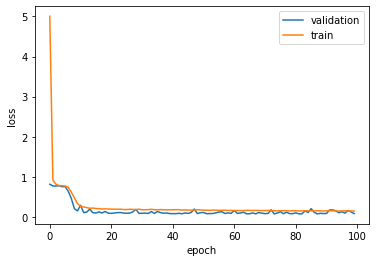

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
y_pred = model.predict(X_val)
y_pred

array([[ 1.7900816 ],
       [ 1.7886337 ],
       [ 1.787139  ],
       ...,
       [-0.5625889 ],
       [-0.56134   ],
       [-0.57298017]], dtype=float32)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([[ 1.837837 ],
       [ 1.8268572],
       [ 1.8282788],
       ...,
       [-0.6996944],
       [-0.701025 ],
       [-0.704857 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.08643620417843301

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.8855794360825195

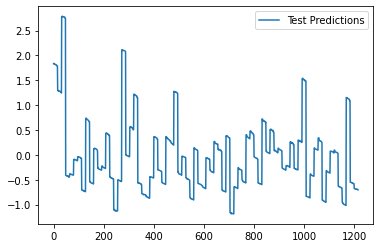

In [ ]:
plt.plot(y_pred_test)
plt.legend(['Test Predictions'])


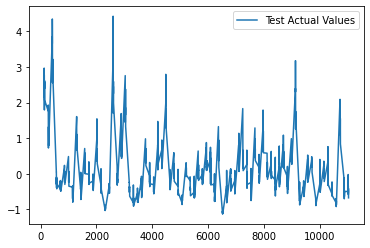

In [ ]:
plt.plot(y_test)
plt.legend(['Test Actual Values'])

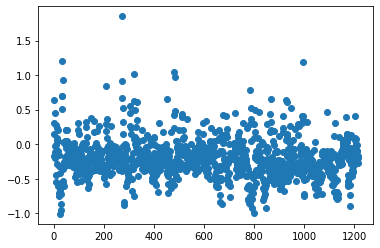

In [ ]:
plt.scatter(range(len(y_test)),y_test-y_pred_test)

In [ ]:
model.save_weights('/content/drive/MyDrive/ANNSucess1.h5')

In [ ]:
y_pred_test= y_pred_test.flatten()
y_pred